In [ ]:
!pip install torchinfo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from sklearn.metrics import confusion_matrix
import torchinfo
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import kagglehub
import math

ModuleNotFoundError: No module named 'torchinfo'

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
print("Path to dataset files:", path)

100%|██████████| 11.2M/11.2M [00:00<00:00, 56.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uciml/forest-cover-type-dataset/versions/1


In [ ]:
# Read dataset into Pandas dataframe:

# Check that the col names are in the right order.
colnames = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
            'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1',
            'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
            'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
            'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
            'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
            'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
            'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
            'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
            'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

#df = pd.read_csv("covtype.data", names=colnames)
df = pd.read_csv(path + "/covtype.csv")
#df = pd.read_csv("/content/covtype.csv")

copy = deepcopy(df)

#remove wilderness areas 2 and 4
df = df[lambda x: x['Wilderness_Area2'] != 1]
df = df[lambda x: x['Wilderness_Area4'] != 1]
df.drop(columns=['Wilderness_Area2', 'Wilderness_Area4'], inplace=True)

df = df.loc[:, (df != 0).any(axis=0)]

In [ ]:
# One-Hot Encode the Cover Types:
df = pd.get_dummies(df, columns=['Cover_Type'], dtype=int)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type_1,Cover_Type_2,Cover_Type_3,Cover_Type_5,Cover_Type_6,Cover_Type_7
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,1,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,1,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,1,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,1,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,1,0,0,0
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,1,0,0,0
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,1,0,0,0
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
def dfSetup():
  path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
  print("Path to dataset files:", path)
  df = pd.read_csv(path + "/covtype.csv")

  #remove wilderness areas 2 and 4
  #df = df[lambda x: x['Wilderness_Area2'] != 1]
  #df = df[lambda x: x['Wilderness_Area4'] != 1]
  #df.drop(columns=['Wilderness_Area2', 'Wilderness_Area4'], inplace=True)
  #df = df.loc[:, (df != 0).any(axis=0)]

  # one hot encoding
  df = pd.get_dummies(df, columns=['Cover_Type'], dtype=int)

  # Isolate our target column:

  # When do convert target values to binary? Before or after?
  targets = pd.DataFrame()
  targets['Horizontal_Distance_To_Fire_Points'] = df['Horizontal_Distance_To_Fire_Points']

  targets = pd.DataFrame(targets)

  return df, targets

In [ ]:
# Isolate our target column:

# When do convert target values to binary? Before or after?
targets = pd.DataFrame()
targets['Horizontal_Distance_To_Fire_Points'] = df['Horizontal_Distance_To_Fire_Points']
targets

,Horizontal_Distance_To_Fire_Points
0,6279
1,6225
2,6121
3,6211
4,6172
...,...
581007,837
581008,845
581009,854
581010,864


<Axes: xlabel='Horizontal_Distance_To_Fire_Points', ylabel='Count'>

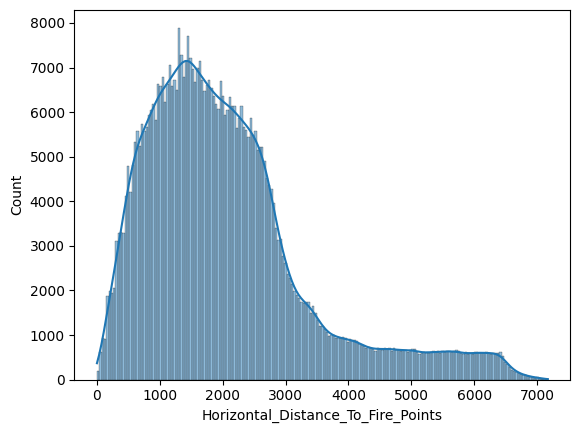

In [ ]:
# View distribution of target values "Horizontal_Distance_To_Fire_Points":
# Distance is in meters.
targets = pd.DataFrame(targets)
sns.histplot(data=targets, x="Horizontal_Distance_To_Fire_Points", kde=True)

In [ ]:
# check the number of fire starts within the threshold
def thresholdStatsCheck(threshold, targets):
  threshold = 1600
  fireInSameSquare = 0
  for num in targets.iloc[:,0]:
    if num <= threshold:
      fireInSameSquare += 1

  print("number of fires in the same square as obs: " + str(fireInSameSquare))
  print("total negatives: " + str(len(targets) - fireInSameSquare))
  print("total observations: " + str(len(targets)))
  print("percentage of positives to negatives: " + str(fireInSameSquare / len(targets)))
  return fireInSameSquare

#fireInSameSquare = thresholdStatsCheck(1600)

In [ ]:
# change distances to true or false based on threshold
def categorizeFire(threshold, targets):
  categoricalTargets = deepcopy(targets)
  for i, entry in enumerate(targets.iloc[:,0]):
    categoricalTargets.iloc[i, 0] = (entry <= threshold)

  #print(categoricalTargets)
  return categoricalTargets
categoricalTargets = categorizeFire(1600, targets)

<ipython-input-12-b83a4242c98f>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  categoricalTargets.iloc[i, 0] = (entry <= threshold)


In [ ]:
def oneHotColNames():
  #get col names to drop later
  soilColNames = []
  for i in range(1, 41, 1):
    if i in [1, 5, 6, 15, 25]:
      continue
    soilColNames.append(f"Soil_Type{i}")

  wildernessColNames = ["Wilderness_Area1", "Wilderness_Area3"]
  for i in range(1, 5, 1):
    print("'" + f"Wilderness_Area{i}" + "'" + ",", end=" ")
    wildernessColNames.append(f"Wilderness_Area{i}")

  coverColNames = []
  for i in range(1, 8, 1):
    if i == 4:
      continue
    print("'" + f"Cover_Type_{i}" + "'" + ",", end=" ")
    coverColNames.append(f"Cover_Type_{i}")

  return soilColNames + wildernessColNames + coverColNames

In [ ]:
# drop some categorical columns, calculate correlation coeffs

# add all one hot columns to one big list
allOneHotColumns = oneHotColNames()

# drop one hot columns to reduce dimensionality
noCategorical = df.drop(allOneHotColumns, axis=1)

correlation_matrix = noCategorical.corr()

correlation_matrix2 = df.corr()
print(correlation_matrix2)

'Cover_Type_1', 'Cover_Type_2', 'Cover_Type_3', 'Cover_Type_5', 'Cover_Type_6', 'Cover_Type_7',                                     Elevation    Aspect     Slope  \
Elevation                            1.000000  0.081793 -0.101097   
Aspect                               0.081793  1.000000  0.064909   
Slope                               -0.101097  0.064909  1.000000   
Horizontal_Distance_To_Hydrology     0.313873  0.022390  0.019250   
Vertical_Distance_To_Hydrology       0.189442  0.061938  0.274839   
Horizontal_Distance_To_Roadways      0.342615  0.073734 -0.180701   
Hillshade_9am                       -0.023588 -0.570661 -0.277626   
Hillshade_Noon                       0.098435  0.369372 -0.487952   
Hillshade_3pm                        0.088738  0.640101 -0.197836   
Horizontal_Distance_To_Fire_Points  -0.009711 -0.084175 -0.152489   
Wilderness_Area1                     0.044681 -0.122357 -0.210529   
Wilderness_Area3                    -0.044681  0.122357  0.210529   
Soil_Ty

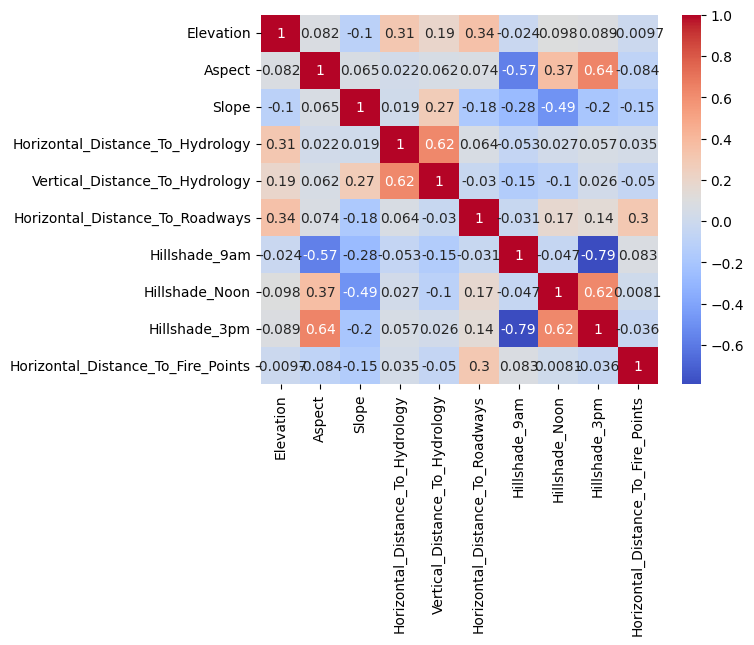

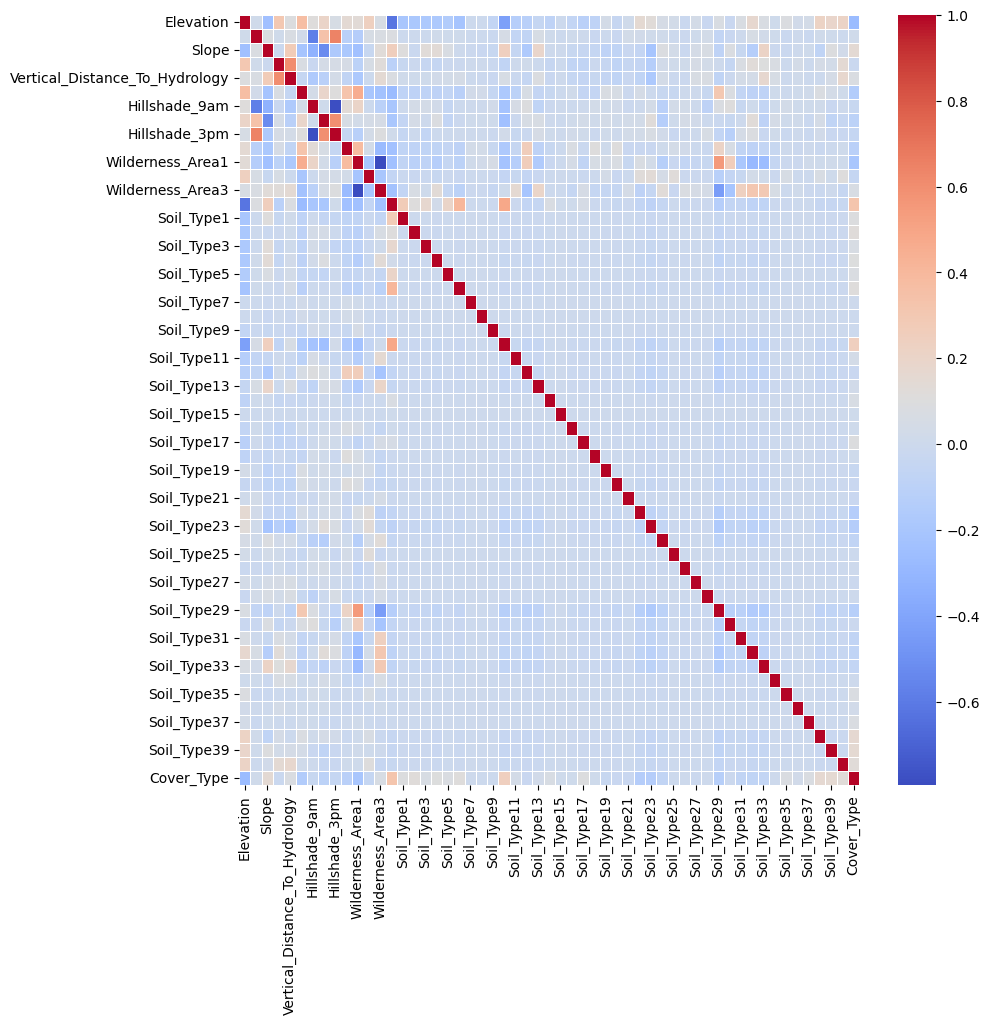

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(copy.corr(), cmap='coolwarm', linewidths=.5, ax=ax)
plt.show()

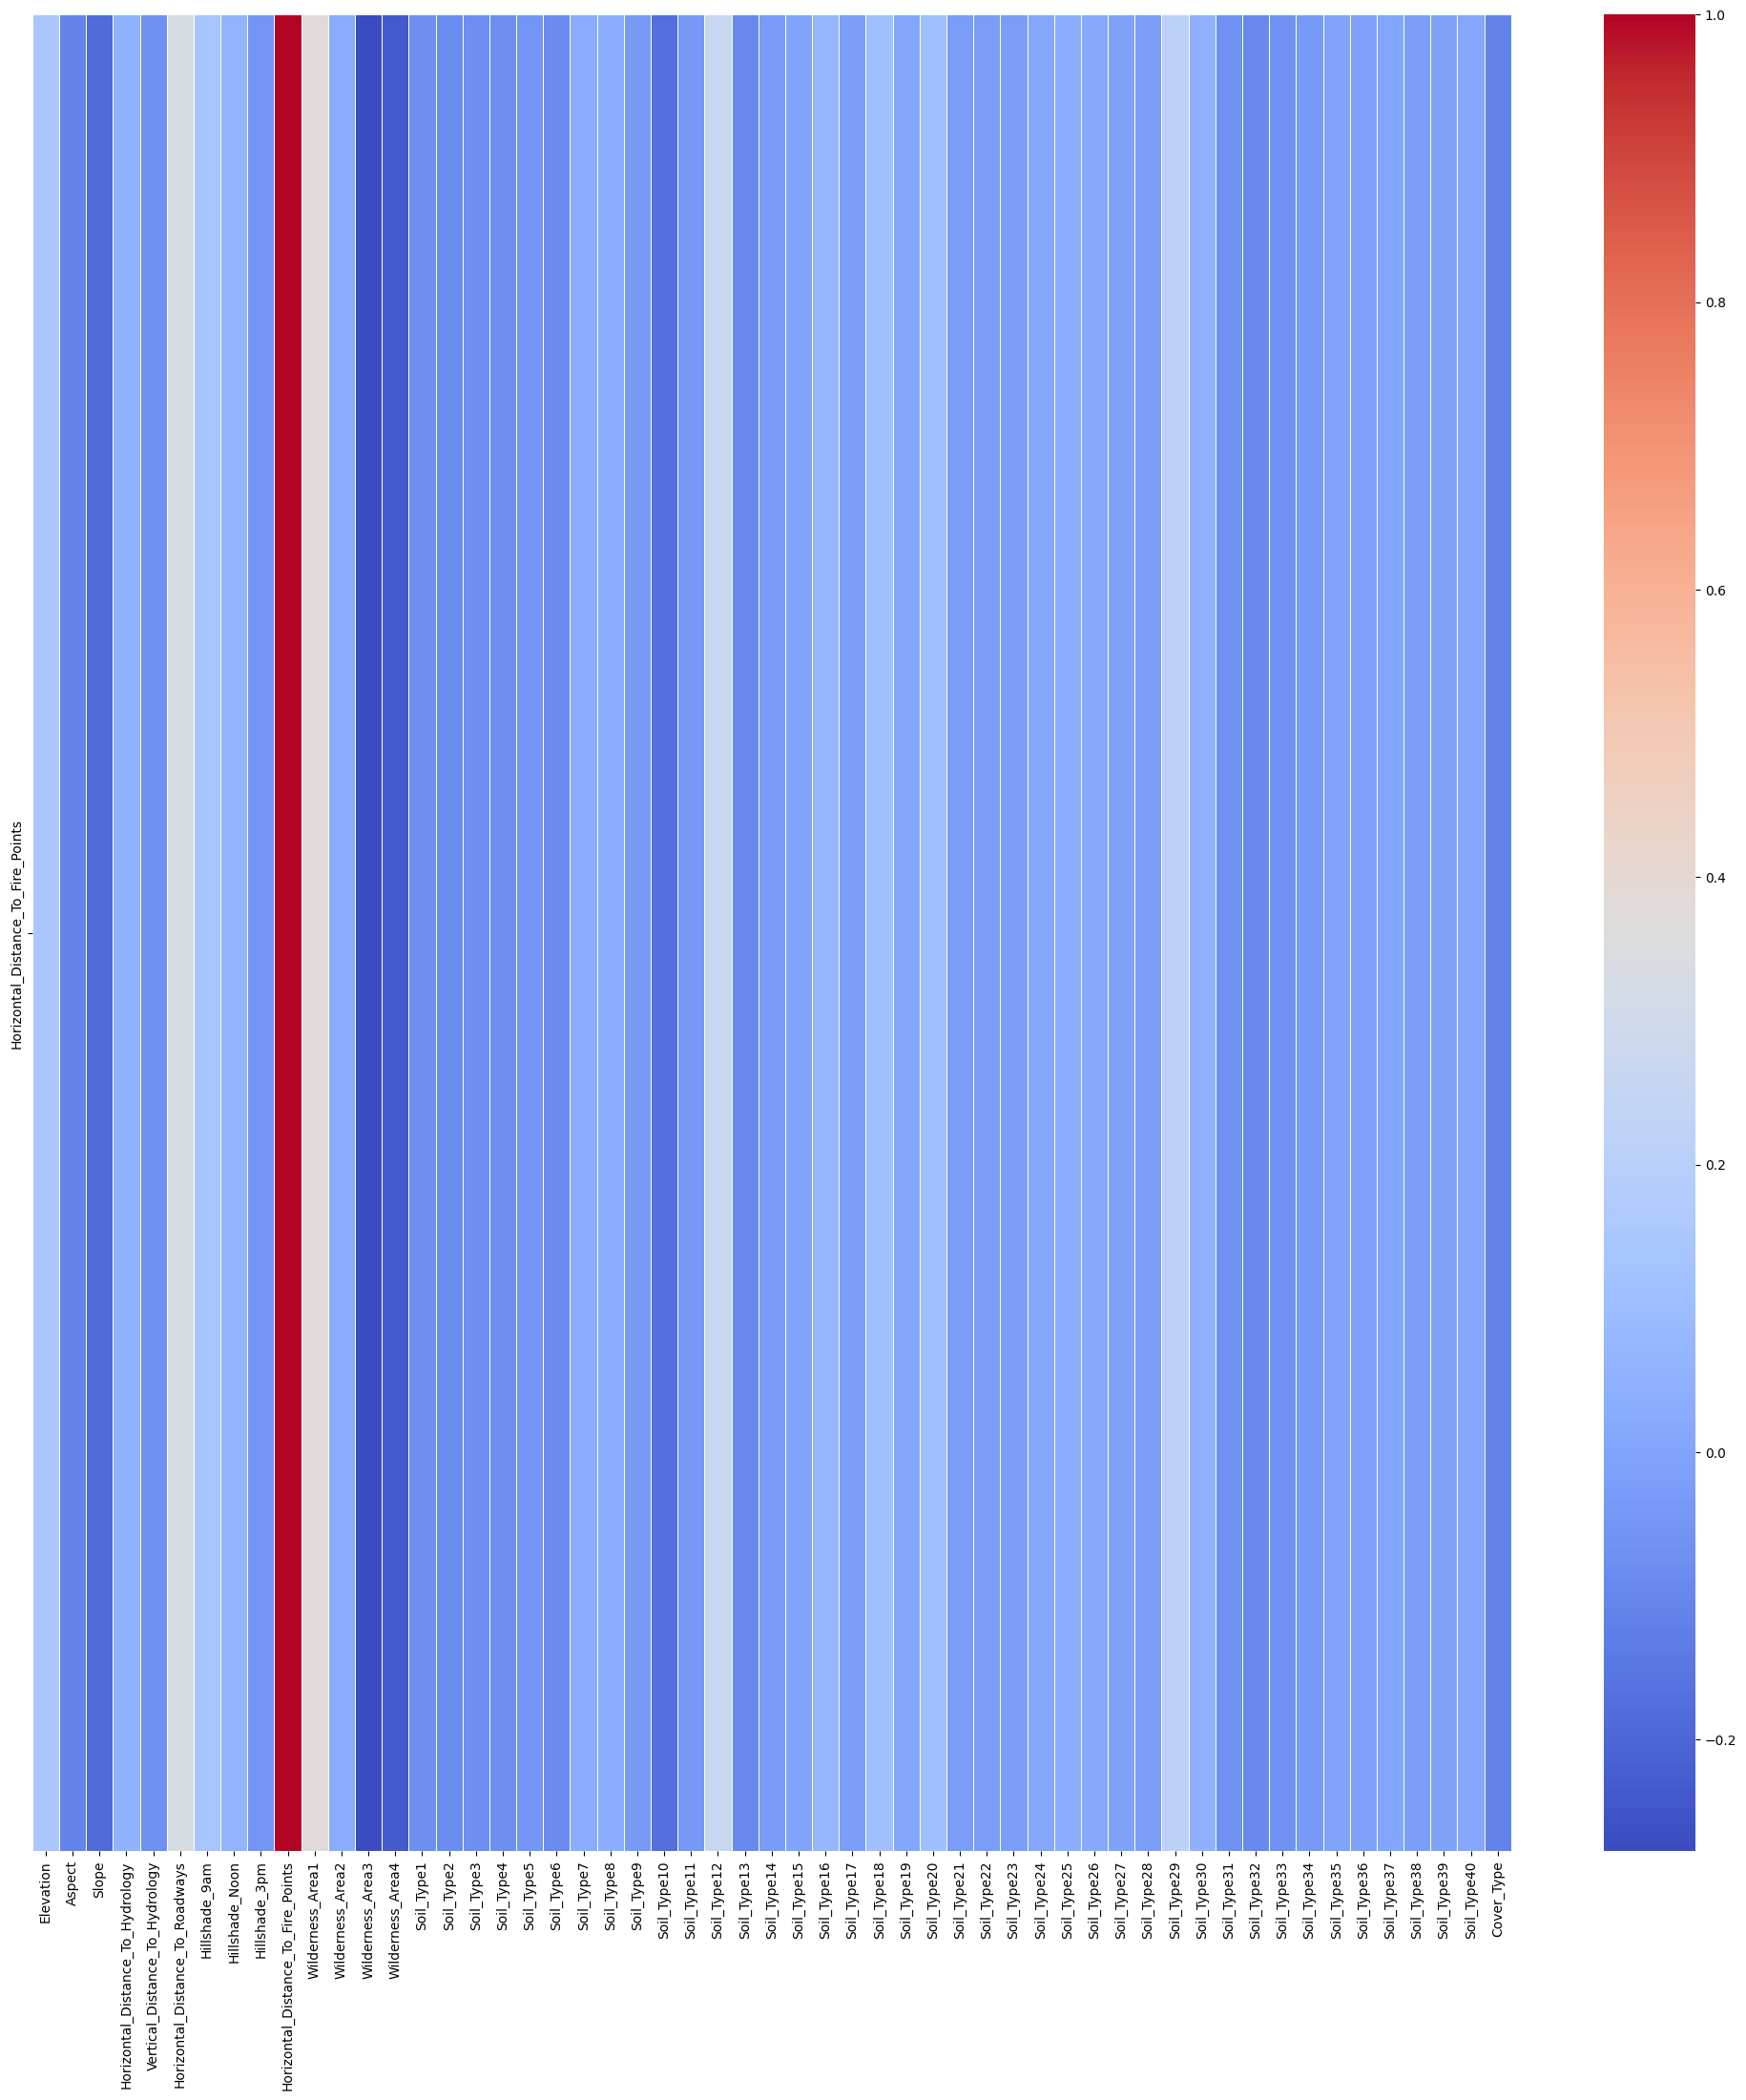

In [ ]:
correlation_matrix3 = copy.corr()

fig, ax = plt.subplots(figsize=(25,25))         # Sample figsize in inches
sns.heatmap(correlation_matrix3[['Horizontal_Distance_To_Fire_Points']].transpose(), cmap='coolwarm', linewidths=.5, ax=ax)
plt.show()

In [ ]:
# find the best features from the data for horizontal distance to fire points
bestFeatures = sorted(correlation_matrix3['Horizontal_Distance_To_Fire_Points'], key=lambda k: abs(k), reverse=True)

bestFeatures.pop(0)

print(correlation_matrix3['Horizontal_Distance_To_Fire_Points'])
for num in bestFeatures:
  temp = str((correlation_matrix3['Horizontal_Distance_To_Fire_Points'][correlation_matrix3['Horizontal_Distance_To_Fire_Points'] == num]).index[0]) + "            " + str((correlation_matrix3['Horizontal_Distance_To_Fire_Points'][correlation_matrix3['Horizontal_Distance_To_Fire_Points'] == num])[0])
  print(temp)

print(bestFeatures)

Elevation                             0.148022
Aspect                               -0.109172
Slope                                -0.185662
Horizontal_Distance_To_Hydrology      0.051874
Vertical_Distance_To_Hydrology       -0.069913
Horizontal_Distance_To_Roadways       0.331580
Hillshade_9am                         0.132669
Hillshade_Noon                        0.057329
Hillshade_3pm                        -0.047981
Horizontal_Distance_To_Fire_Points    1.000000
Wilderness_Area1                      0.380568
Wilderness_Area2                      0.027473
Wilderness_Area3                     -0.277510
Wilderness_Area4                     -0.236548
Soil_Type1                           -0.073607
Soil_Type2                           -0.081716
Soil_Type3                           -0.076340
Soil_Type4                           -0.076478
Soil_Type5                           -0.051845
Soil_Type6                           -0.087305
Soil_Type7                            0.028390
Soil_Type8   

<ipython-input-17-cbb0c2fd0916>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = str((correlation_matrix3['Horizontal_Distance_To_Fire_Points'][correlation_matrix3['Horizontal_Distance_To_Fire_Points'] == num]).index[0]) + "            " + str((correlation_matrix3['Horizontal_Distance_To_Fire_Points'][correlation_matrix3['Horizontal_Distance_To_Fire_Points'] == num])[0])


In [ ]:
# get best n features
def nFeatures(n, correlation_matrix):
  bestFeatures = sorted(correlation_matrix['Horizontal_Distance_To_Fire_Points'], key=lambda k: abs(k), reverse=True)
  bestFeatures.pop(0) #remove horizontal distance to fire points
  bestNFeatures = []
  for i, num in enumerate(bestFeatures):
    if len(bestNFeatures) == n:
      break
    elif math.isnan(num):
      continue
    bestNFeatures.append((correlation_matrix['Horizontal_Distance_To_Fire_Points'][correlation_matrix['Horizontal_Distance_To_Fire_Points'] == num]).index[0])
    temp = str((correlation_matrix['Horizontal_Distance_To_Fire_Points'][correlation_matrix['Horizontal_Distance_To_Fire_Points'] == num]).index[0]) + "            " + str((correlation_matrix['Horizontal_Distance_To_Fire_Points'][correlation_matrix['Horizontal_Distance_To_Fire_Points'] == num])[0])
    #print(temp)
  return bestNFeatures

In [ ]:
# remove non selected features
def getBestFeaturesAndPrune(n, df):
  allOneHotColumns = oneHotColNames()

  corr_mat = df.corr()

  bestFeats = nFeatures(n, corr_mat)
  copyOfDf = deepcopy(df)

  namesToDrop = []
  oneHots = []
  numericals = []
  for col in copyOfDf.columns.tolist():
    if col not in bestFeats:
      namesToDrop.append(col)
    elif col in allOneHotColumns:
      oneHots.append(col)
    else:
      numericals.append(col)

  selected = copyOfDf.drop(namesToDrop, axis=1)

  #print(selected)
  assert(len(selected.columns) == n)

  return selected, oneHots, numericals

In [ ]:
#scale data for rbf

def scaleData(selected, oneHots, numericals):
  #print("one hots:")
  #print(oneHots)
  print("selected features:")
  print(selected.columns)
  #save one hot data:

  #rows_with_nan = selected[selected.isna().any(axis=1)].index.tolist()

  #print("rows with NaN values:", rows_with_nan)

  oneHotCols = selected.loc[:, oneHots]

  #remove one hot data
  selected.drop(columns=oneHots, inplace=True)

  #scale data
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(selected)
  # convert to df and add back one hot
  scaled_data = pd.DataFrame(scaled_data, columns=numericals, index=selected.index)
  scaled_data = scaled_data.join(oneHotCols)

  return scaled_data

# encode the targets so we can use them in the model
def encodeTargets(categoricalTargets):
  encoder = LabelEncoder()
  return encoder.fit_transform(categoricalTargets)

In [ ]:
def checkTrues(data):
  trueCount = 0
  counter = 0
  for entry in data:
    if entry:
      trueCount += 1
    counter += 1
  print("total: " + str(counter))
  print("trues: " + str(trueCount))
  print("false: " + str(counter - trueCount))
  print("percentage true: " + str(trueCount / counter))

In [ ]:
def analyzeModel(model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset, targets):
  trainScore = model.score(xTrain, yTrain)
  print("train accuracy:")
  print(trainScore)

  testScore = model.score(xTest,yTest)
  print("\ntest accuracy:")
  print(testScore)

  yPredict = model.predict(xTest)
  confusion = confusion_matrix(yTest, yPredict, normalize='true')

  print("\ntest confusion:")
  print(confusion)

  print("percent of dataset:")
  print(str(percentOfDataset * 100) + "%")

  print("Threshold Stats:")
  print(thresholdStatsCheck(threshold, targets))

  print("\nyTrain stats:")
  checkTrues(yTrain)
  print("\nyTest stats:")
  checkTrues(yTest)

  print("total train data: " + str(len(xTrain)))
  print("total test data: " + str(len(xTest)))

  # Print model parameters
  print("Model Parameters:")
  print("Kernel:", model.kernel)
  print("C:", model.C)
  print("Gamma:", model.gamma)
  print("Support Vectors:", model.support_vectors_)
  print("Number of Support Vectors per class:", model.n_support_)
  print("Intercepts:", model.intercept_)

In [ ]:
def trainModel(threshold, n_best, percentOfDataset, df, targets):
  start = time.time()
  # prepare data
  categoricalTargets = categorizeFire(threshold, targets)
  print("1")

  selected, oneHots, numericals = getBestFeaturesAndPrune(n_best, df)
  print("2")

  scaled_data = scaleData(selected, oneHots, numericals)
  print("3")

  y_encoded = encodeTargets(categoricalTargets)
  print("4")

  # split data
  xTrain, xTest, yTrain, yTest = train_test_split(scaled_data, y_encoded, test_size=0.2*percentOfDataset, train_size = .8*percentOfDataset)
  print("5")

  #print(scaled_data)
  #print(y_encoded)
  #print(xTrain)
  #print(yTrain)

  trainStart = time.time()
  #make model and fit
  model = SVC(C = 10, kernel='rbf', gamma=1)
  model.fit(xTrain, yTrain)
  trainEnd = time.time()
  print("6")

  print("setup took: " + str(trainStart - start) + " seconds")
  print("training took: " + str(trainEnd - trainStart) + " seconds")

  analyzeStart = time.time()
  analyzeModel(model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset, targets)
  print("analyze took: " + str(time.time() - analyzeStart) + " seconds")
  print("Done training!")

  return model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset

In [ ]:
df, targets = dfSetup()
model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset = trainModel(1600, 10, .3, df, targets)

Path to dataset files: /root/.cache/kagglehub/datasets/uciml/forest-cover-type-dataset/versions/1


<ipython-input-12-b83a4242c98f>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  categoricalTargets.iloc[i, 0] = (entry <= threshold)


1
'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Cover_Type_1', 'Cover_Type_2', 'Cover_Type_3', 'Cover_Type_5', 'Cover_Type_6', 'Cover_Type_7', 

<ipython-input-29-703a145c1585>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = str((correlation_matrix['Horizontal_Distance_To_Fire_Points'][correlation_matrix['Horizontal_Distance_To_Fire_Points'] == num]).index[0]) + "            " + str((correlation_matrix['Horizontal_Distance_To_Fire_Points'][correlation_matrix['Horizontal_Distance_To_Fire_Points'] == num])[0])


2
selected features:
Index(['Elevation', 'Slope', 'Horizontal_Distance_To_Roadways',
       'Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type10', 'Soil_Type12', 'Soil_Type29', 'Cover_Type_3'],
      dtype='object')
3
4


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5
6
setup took: 31.759430646896362 seconds
training took: 1121.5589232444763 seconds


In [ ]:
def analyzeSVRModel(model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset, targets):
    '''

    trainScore = model.score(xTrain, yTrain)
    print("train accuracy:")
    print(trainScore)

    testScore = model.score(xTest,yTest)
    print("\ntest accuracy:")
    print(testScore)

   '''
    yPredict = model.predict(xTest)
    y_pred_classified = (yPredict < threshold).astype(int) # categorize predictions
    y_test_classified = (yTest < threshold).astype(int)
    print(classification_report(y_test_classified, y_pred_classified))
    confusion = confusion_matrix(y_test_classified, y_pred_classified, normalize='true')

    print("\ntest confusion:")
    print(confusion)
    print('test accuracy: ', accuracy_score(y_test_classified, y_pred_classified))


    yTrainPredict = model.predict(xTrain)
    y_trainpred_classified = (yTrainPredict < threshold).astype(int) # categorize predictions
    y_train_classified = (yTrain < threshold).astype(int)
    print('train accuracy: ', accuracy_score(y_train_classified, y_trainpred_classified))


    print("percent of dataset:")
    print(str(percentOfDataset * 100) + "%")



    # print("Threshold Stats:")
    # print(thresholdStatsCheck(threshold, targets))

    #print("\nyTrain stats:")
    #checkTrues(yTrain)
    #print("\nyTest stats:")
    #checkTrues(yTest)

    #print("total train data: " + str(len(xTrain)))
    #print("total test data: " + str(len(xTest)))

    # Print model parameters
    print("Model Parameters:")
    print("Kernel:", model.kernel)
    print("C:", model.C)
    print("Gamma:", model.gamma)
    print("Epsilon:", model.epsilon)
    print("Support Vectors:", model.support_vectors_)
    print("Number of Support Vectors per class:", model.n_support_)
    print("Intercepts:", model.intercept_)

In [ ]:
def trainSVRmodel(threshold, n_best, percentOfDataset, df, targets):
    start = time.time()
    selected, oneHots, numericals = getBestFeaturesAndPrune(n_best, df)
    print("1")

    scaled_data = scaleData(selected, oneHots, numericals)
    print("2")

    xTrain, xTest, yTrain, yTest = train_test_split(scaled_data, targets, test_size=0.3*percentOfDataset, train_size = 0.7*percentOfDataset, random_state=42)
    print("3")

    trainStart = time.time()
    #make model and fit
    model = SVR(C = 100, kernel='rbf', gamma=1, epsilon=1)
    model.fit(xTrain, yTrain)
    trainEnd = time.time()
    print("4")

    print("setup took: " + str(trainStart - start) + " seconds")
    print("training took: " + str(trainEnd - trainStart) + " seconds")

    analyzeStart = time.time()
    analyzeSVRModel(model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset, targets)
    print("analyze took: " + str(time.time() - analyzeStart) + " seconds")
    print("Done training!")

In [ ]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [ ]:
analyzeModel(model, threshold, xTrain, yTrain, xTest, yTest, percentOfDataset)

# Testing

In [ ]:
df

# Code for model that I was testing on my own computer, work in progress


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import classification_report,  confusion_matrix
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
# print("Path to dataset files:", path)
df = pd.read_csv(path + "/covtype.csv")

df = pd.get_dummies(df, columns=['Cover_Type'], dtype =int)


correlation_matrix = df.corr()

target_correlation = correlation_matrix['Horizontal_Distance_To_Fire_Points'].sort_values(ascending=False)
features_to_drop = target_correlation[abs(target_correlation) <= 0.1].index  # keep more significant features
df_filtered = df.drop(columns=features_to_drop) # to be used instead of all features


df_sampled = df_filtered.sample(frac=0.02, random_state=42) # using only fraction of data to determine best hyperparamters

X = df_sampled.drop('Horizontal_Distance_To_Fire_Points', axis=1) # inputs

y = df_sampled['Horizontal_Distance_To_Fire_Points'] # target

y = pd.to_numeric(y, errors='coerce') # for some reason, some points to fire had values which were represented as strings


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

present_numeric_features = list(set(numeric_features) & set(X_train.columns))

scaler = StandardScaler() # used default scaler, not sure if there was a better option
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if present_numeric_features:
    X_train_scaled[present_numeric_features] = scaler.fit_transform(X_train[present_numeric_features])
    X_test_scaled[present_numeric_features] = scaler.transform(X_test[present_numeric_features])


# i tested a lot of combinations for hyperparameters, when accuracy/other metrics performed well model was definitely overfit
param_grid = { # can definitely change the values I used
    'C': [0.1, 0.5, 1, 5, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto', 0.05, 0.1, 1],
    'kernel': ['rbf']
}


svr = SVR()

random_search = RandomizedSearchCV( # havent tried randomsearch yet
    estimator=svr, param_distributions=param_grid,
    n_iter=10, cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, random_state=42
)

random_search.fit(X_train_scaled, y_train)

print(f"Best Hyperparameters: {random_search.best_params_}")

y_pred = random_search.predict(X_test_scaled)

y_train_pred = random_search.predict(X_train_scaled)

# Train MSE and R2
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Train MSE: {train_mse} Train R2: {train_r2}')

# Test MSE and R2
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
print(f'Test MSE: {test_mse} Test R2: {test_r2}')


threshold = 1750 # just  a placeholder, but definitely a better way to figure this out


y_pred_classified = (y_pred < threshold).astype(int) # categorize predictions
y_test_classified = (y_test < threshold).astype(int) # categorize test data

# Checking Results with confusion matrix/classification report
cm = confusion_matrix(y_test_classified, y_pred_classified)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test_classified, y_pred_classified))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import kagglehub

path = kagglehub.dataset_download("uciml/forest-cover-type-dataset")
# print("Path to dataset files:", path)
df = pd.read_csv(path + "/covtype.csv")

df = pd.get_dummies(df, columns=['Cover_Type'], dtype =int)

# Remove rows/observations for wilderness areas 2 and 4.
'''
df = df[lambda x: x['Wilderness_Area2'] != 1]
df = df[lambda x: x['Wilderness_Area4'] != 1]
df.drop(columns=['Wilderness_Area2', 'Wilderness_Area4'], inplace=True)
df = df.loc[:, (df != 0).any(axis=0)]
'''

correlation_matrix = df.corr()

target_correlation = correlation_matrix['Horizontal_Distance_To_Fire_Points'].sort_values(ascending=False)
features_to_drop = target_correlation[abs(target_correlation) <= 0.1].index  # keep more significant features

df_filtered = df.drop(columns=features_to_drop) # to be used instead of all features

df_sampled = df_filtered.sample(frac=0.10, random_state=42)

X = df_sampled.drop('Horizontal_Distance_To_Fire_Points', axis=1) # inputs

y = df_sampled['Horizontal_Distance_To_Fire_Points'] # target

y = pd.to_numeric(y, errors='coerce') # for some reason, some points to fire had values which were represented as strings

threshold = 1600

y_thresholded = (y <= threshold).astype(int) # categorize test data


X_train, X_test, y_train, y_test = train_test_split(X, y_thresholded, test_size=0.2, random_state=42)

numeric_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

present_numeric_features = list(set(numeric_features) & set(X_train.columns))

scaler = StandardScaler() # used default scaler, not sure if there was a better option
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

if present_numeric_features:
    X_train_scaled[present_numeric_features] = scaler.fit_transform(X_train[present_numeric_features])
    X_test_scaled[present_numeric_features] = scaler.transform(X_test[present_numeric_features])


model = SVC(C = 10, kernel='rbf', gamma=1)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Best Parameters: {'kernel': 'rbf', 'gamma': 1, 'C': 10} with gridsearch
'''
param_dist = {
    'C': [10],  # Fixed values instead of a random range
    'kernel': ['rbf'],
    'gamma': [1],  # Fixed values
}

param_dist = {
    'C': [0.1, 1, 10, 100, 1000],  # Fixed values instead of a random range
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Fixed values
}


random_search = RandomizedSearchCV(
    model, param_distributions=param_dist,
    n_iter=1,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)


random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)



y_pred = random_search.predict(X_test_scaled)
'''




Confusion Matrix:
[[5259  940]
 [1266 4156]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6199
           1       0.82      0.77      0.79      5422

    accuracy                           0.81     11621
   macro avg       0.81      0.81      0.81     11621
weighted avg       0.81      0.81      0.81     11621



'\nparam_dist = {\n    \'C\': [10],  # Fixed values instead of a random range\n    \'kernel\': [\'rbf\'],\n    \'gamma\': [1],  # Fixed values\n}\n\nparam_dist = {\n    \'C\': [0.1, 1, 10, 100, 1000],  # Fixed values instead of a random range\n    \'kernel\': [\'rbf\'],\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.01, 0.1, 1],  # Fixed values\n}\n\n\nrandom_search = RandomizedSearchCV(\n    model, param_distributions=param_dist,\n    n_iter=1,\n    scoring=\'accuracy\',\n    cv=5,\n    n_jobs=-1,\n    random_state=42\n)\n\n\nrandom_search.fit(X_train_scaled, y_train)\n\nprint("Best Parameters:", random_search.best_params_)\n\n\n\ny_pred = random_search.predict(X_test_scaled)\n'